In [2]:
import os
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
os.environ["OMP_NUM_THREADS"] = "8"  #并行训练
rng = np.random.RandomState(4315)
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
warnings.filterwarnings("ignore")

In [282]:
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')

In [284]:
Y_test_mean = Y_test_mean.dropna()

In [244]:
Y_train_mean = train['mean_price']
Y_train_number = train['number_price']
train.drop([u'Unnamed: 0', u'X', u'zipcode', u'mean_price', u'number_price','metropolitan','state','City'], axis=1, inplace=True)
X_train = train
Y_test_mean = test['mean_price']
Y_test_number = test['number_price']
test.drop([u'Unnamed: 0', u'X', u'zipcode', u'mean_price', u'number_price','metropolitan','state','City'], axis=1, inplace=True)
X_test = test

In [239]:
Y_train_mean = Y_train_mean.dropna()

In [240]:
Y_train_mean.shape

(354,)

In [241]:
X_train = X_train.dropna()

In [242]:
X_train.shape

(355, 32)

In [286]:
y_train_mean = Y_train_mean
y_train_number = Y_train_number
x_train = (X_train - X_train.mean())/X_train.std()
y_test_mean = Y_test_mean
y_test_number = Y_test_number
x_test = (X_test - X_test.mean())/X_test.std()

In [249]:
y_train_mean.shape

(354,)

Automatically created module for IPython interactive environment
RMSE: 57.9372
RMSE: 101.9845


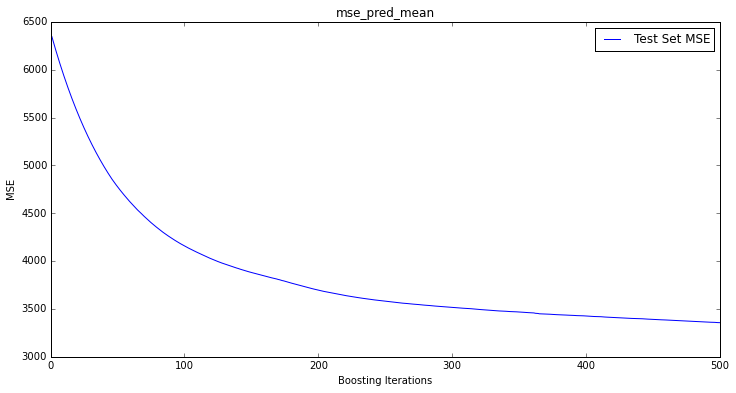

In [245]:
print(__doc__)
% matplotlib inline

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(x_train, y_train_mean)
mse_train = sqrt(mean_squared_error(y_train_mean, clf.predict(x_train)))
mse_test = sqrt(mean_squared_error(y_test_mean, clf.predict(x_test)))


print("RMSE: %.4f" % mse_train)
print("RMSE: %.4f" % mse_test)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_test)):
    test_score[i] = clf.loss_(y_test_mean, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('mse_pred_mean')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Test Set MSE')
#plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
#         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('MSE')
plt.savefig('mean.png')
# #############################################################################
# Plot feature importance
# feature_importance = clf.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(2, 1, 2)
# plt.barh(pos, feature_importance[sorted_idx], align='center',rotate = 90)
# plt.yticks(pos, X_train.columns[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
#plt.show()

In [212]:
params['n_estimators']

500

Automatically created module for IPython interactive environment
RMSE: 101.0777
RMSE: 261.6326


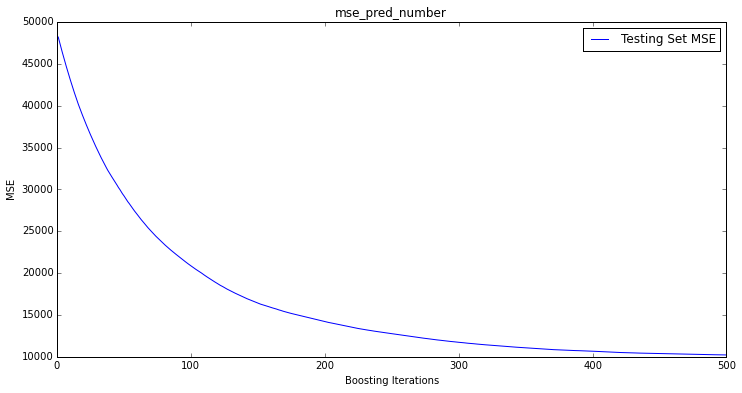

In [205]:
print(__doc__)
% matplotlib inline

# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

# #############################################################################
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(x_train, y_train_number)
mse_train = sqrt(mean_squared_error(y_train_number, clf.predict(x_train)))
mse_test = sqrt(mean_squared_error(y_test_number, clf.predict(x_test)))


print("RMSE: %.4f" % mse_train)
print("RMSE: %.4f" % mse_test)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_test)):
    test_score[i] = clf.loss_(y_test_number, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 1, 1)
plt.title('mse_pred_number')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Testing Set MSE')
#plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
#         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('MSE')
plt.savefig('number.png')
# #############################################################################
# Plot feature importance
# feature_importance = clf.feature_importances_
# # make importances relative to max importance
# feature_importance = 100.0 * (feature_importance / feature_importance.max())
# sorted_idx = np.argsort(feature_importance)
# pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(2, 1, 2)
# plt.barh(pos, feature_importance[sorted_idx], align='center',rotate = 90)
# plt.yticks(pos, X_train.columns[sorted_idx])
# plt.xlabel('Relative Importance')
# plt.title('Variable Importance')
#plt.show()

In [ ]:
import os
import numpy as np
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
os.environ["OMP_NUM_THREADS"] = "8"  #并行训练
rng = np.random.RandomState(4315)
import warnings
warnings.filterwarnings("ignore")

# param_grid = {
#               'max_depth': [3, 4, 5, 7, 9],
#               'n_estimators': [10, 50, 100, 400, 800, 1000, 1200],
#               'learning_rate': [0.1, 0.2, 0.3],
#               'gamma':[0, 0.2],
#               'subsample': [0.8, 1],
#               'colsample_bylevel':[0.8, 1]
#              }

param_grid = {
              'max_depth': [3, 4, 5],
              'n_estimators': [10, 50, 100],
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma':[0, 0.2],
              'subsample': [0.8, 1],
              'colsample_bylevel':[0.8, 1]
             }

xgb_model = xgb.XGBRegressor()
rgs = GridSearchCV(xgb_model, param_grid, n_jobs=-1)
rgs.fit(X, Y)
print(rgs.best_score_)
print(rgs.best_params_)

In [174]:
def get_rmse(x_train, y_train, x_test,y_test):
    dtrain = xgb.DMatrix(x_train, label=y_train)
    watchlist = [(dtrain, 'train')]
    param = {'colsample_bylevel': 1, 'learning_rate': 0.3, 'n_estimators': 100, 'subsample': 0.8, 'max_depth': 5, 'gamma': 0.2}
    num_round = 200
    bst = xgb.train(param, dtrain, num_round, watchlist)
    dtest = xgb.DMatrix(x_test)
    ypred_test = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
    ypred_train = bst.predict(dtrain,ntree_limit=bst.best_ntree_limit)
    rms_mean_train = sqrt(mean_squared_error(y_train, ypred_train))
    rms_mean_test = sqrt(mean_squared_error(y_test, ypred_test))
    
    return rms_mean_train, rms_mean_test, ypred_train, ypred_test

In [287]:
dtrain = xgb.DMatrix(x_train, label=y_train_mean)
watchlist = [(dtrain, 'train')]
param = {'colsample_bylevel': 1, 'learning_rate': 0.3, 'n_estimators': 100, 'subsample': 0.8, 'max_depth': 5, 'gamma': 0.2}
num_round = 200
bst = xgb.train(param, dtrain, num_round, watchlist)
dtest = xgb.DMatrix(x_test)
ypred_test = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
ypred_train = bst.predict(dtrain,ntree_limit=bst.best_ntree_limit)
rms_mean_train = sqrt(mean_squared_error(y_train_mean, ypred_train))
rms_mean_test = sqrt(mean_squared_error(y_test_mean, ypred_test))

[0]	train-rmse:119.775
[1]	train-rmse:97.6725
[2]	train-rmse:83.6025
[3]	train-rmse:76.271
[4]	train-rmse:70.5204
[5]	train-rmse:67.93
[6]	train-rmse:66.5041
[7]	train-rmse:65.6475
[8]	train-rmse:64.1927
[9]	train-rmse:62.6731
[10]	train-rmse:61.8326
[11]	train-rmse:61.0781
[12]	train-rmse:60.6983
[13]	train-rmse:59.9826
[14]	train-rmse:59.7377
[15]	train-rmse:59.4589
[16]	train-rmse:59.1886
[17]	train-rmse:58.6919
[18]	train-rmse:58.4868
[19]	train-rmse:58.2566
[20]	train-rmse:58.0151
[21]	train-rmse:57.8387
[22]	train-rmse:57.5692
[23]	train-rmse:57.305
[24]	train-rmse:57.1656
[25]	train-rmse:57.128
[26]	train-rmse:57.051
[27]	train-rmse:56.9236
[28]	train-rmse:56.8996
[29]	train-rmse:56.8201
[30]	train-rmse:56.7256
[31]	train-rmse:56.6254
[32]	train-rmse:56.5827
[33]	train-rmse:56.5438
[34]	train-rmse:56.4446
[35]	train-rmse:56.3658
[36]	train-rmse:56.3335
[37]	train-rmse:56.2701
[38]	train-rmse:56.2097
[39]	train-rmse:56.196
[40]	train-rmse:56.1376
[41]	train-rmse:56.007
[42]	train

ValueError: Found input variables with inconsistent numbers of samples: [117, 119]

In [250]:
a,b,c,d = get_rmse(x_train,y_train_mean,x_test,y_test_mean)

[0]	train-rmse:119.775
[1]	train-rmse:97.6725
[2]	train-rmse:83.6025
[3]	train-rmse:76.271
[4]	train-rmse:70.5204
[5]	train-rmse:67.93
[6]	train-rmse:66.5041
[7]	train-rmse:65.6475
[8]	train-rmse:64.1927
[9]	train-rmse:62.6731
[10]	train-rmse:61.8326
[11]	train-rmse:61.0781
[12]	train-rmse:60.6983
[13]	train-rmse:59.9826
[14]	train-rmse:59.7377
[15]	train-rmse:59.4589
[16]	train-rmse:59.1886
[17]	train-rmse:58.6919
[18]	train-rmse:58.4868
[19]	train-rmse:58.2566
[20]	train-rmse:58.0151
[21]	train-rmse:57.8387
[22]	train-rmse:57.5692
[23]	train-rmse:57.305
[24]	train-rmse:57.1656
[25]	train-rmse:57.128
[26]	train-rmse:57.051
[27]	train-rmse:56.9236
[28]	train-rmse:56.8996
[29]	train-rmse:56.8201
[30]	train-rmse:56.7256
[31]	train-rmse:56.6254
[32]	train-rmse:56.5827
[33]	train-rmse:56.5438
[34]	train-rmse:56.4446
[35]	train-rmse:56.3658
[36]	train-rmse:56.3335
[37]	train-rmse:56.2701
[38]	train-rmse:56.2097
[39]	train-rmse:56.196
[40]	train-rmse:56.1376
[41]	train-rmse:56.007
[42]	train

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [288]:
pd.DataFrame(ypred_train,columns=['pred']).to_csv('pred_mean_train.csv')
pd.DataFrame(ypred_test,columns=['pred']).to_csv('pred_mean_test.csv')

In [219]:
bst.get_fscore().items()

[('population', 23),
 ('X.75.000..99.999', 9),
 ('X.50.000..64.999', 14),
 ('X.10.000..14.999', 28),
 ('X15.19_years', 6),
 ('X.9.999_or_less', 13),
 ('X45.54_years', 4),
 ('X20.24_years', 1),
 ('X65.74_years', 4),
 ('X.25.000..34.999', 11),
 ('X.35.000..49.999', 12),
 ('X55.59_years', 5),
 ('ZRI_rank', 231),
 ('X10.14_years', 10),
 ('X2016Q3_gdp', 45),
 ('X25.34_years', 2),
 ('X2016.12_ur', 7),
 ('X75.84_years', 3),
 ('median_household_income', 10),
 ('X5.9_years', 3),
 ('X.15.000..24.999', 30),
 ('ZHVI_rank', 172),
 ('ZHVI_latest_value', 89),
 ('X.100.000_or_more', 24),
 ('X.65.000..74.999', 11)]

In [180]:
A,B,C,D =  get_rmse(x_train,y_train_number,x_test,y_test_number)

[0]	train-rmse:208.266
[1]	train-rmse:180.721
[2]	train-rmse:160.12
[3]	train-rmse:144.845
[4]	train-rmse:134.477
[5]	train-rmse:127.306
[6]	train-rmse:122.216
[7]	train-rmse:119.774
[8]	train-rmse:114.629
[9]	train-rmse:111.113
[10]	train-rmse:108.882
[11]	train-rmse:107.113
[12]	train-rmse:105.209
[13]	train-rmse:103.115
[14]	train-rmse:102.308
[15]	train-rmse:99.9082
[16]	train-rmse:98.5003
[17]	train-rmse:97.2798
[18]	train-rmse:96.2718
[19]	train-rmse:95.6433
[20]	train-rmse:95.0146
[21]	train-rmse:94.7131
[22]	train-rmse:94.2803
[23]	train-rmse:93.8985
[24]	train-rmse:93.6429
[25]	train-rmse:93.4142
[26]	train-rmse:93.1875
[27]	train-rmse:93.1169
[28]	train-rmse:92.8362
[29]	train-rmse:92.6295
[30]	train-rmse:92.4829
[31]	train-rmse:92.3112
[32]	train-rmse:92.2385
[33]	train-rmse:92.226
[34]	train-rmse:92.0928
[35]	train-rmse:92.1095
[36]	train-rmse:91.8964
[37]	train-rmse:91.6627
[38]	train-rmse:91.5937
[39]	train-rmse:91.543
[40]	train-rmse:91.486
[41]	train-rmse:91.3964
[42]	t

In [185]:
pd.DataFrame(C,columns=['pred']).to_csv('pred_number_train.csv')
pd.DataFrame(D,columns=['pred']).to_csv('pred_number_test.csv')

In [190]:
importance = pd.DataFrame(bst.get_fscore().items(), columns=['feature','importance']).sort_values('importance', ascending=False).reset_index()

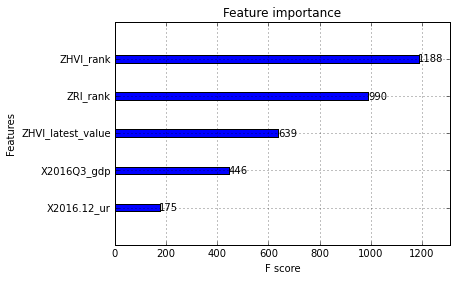

In [93]:
xgb.plot_importance(bst)

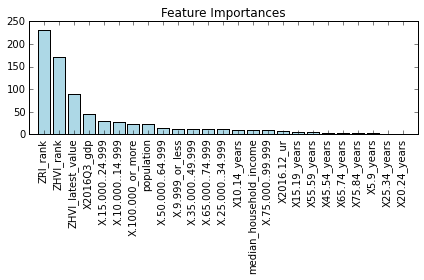

In [192]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Feature Importances')
plt.bar(range(importance.shape[0]), 
        importance['importance'],
        color='lightblue', 
        align='center')

plt.xticks(range(importance.shape[0]), 
           list(importance['feature']), rotation=90)
plt.xlim([-1, importance.shape[0]])
plt.tight_layout()
plt.savefig('./xgboost_feature.png', dpi=300)
plt.show()

In [5]:
calendar = pd.read_csv('./calendar.csv')

In [100]:
calendar.head()

,id,date,available,price,metri_area
0,2515,2018-03-05,t,$69.00,NYC
1,2515,2018-03-04,t,$69.00,NYC
2,2515,2018-03-03,t,$69.00,NYC
3,2515,2018-03-02,t,$69.00,NYC
4,2515,2018-03-01,t,$69.00,NYC


In [99]:
calendar.columns = ['id','date','available','price','metri_area']

In [ ]:
select_calendar = calendar[['id','price']].dropna()

In [137]:
select_calendar['price_clean'] = select_calendar['price'].apply(get_price)

In [147]:
select_list['zipcode'][0]

'10464'

In [148]:
real_estate['zipcode'][0]

10025

In [141]:
calendar_combine = select_calendar[['id','price_clean']].groupby('id',as_index = False).mean()

In [142]:
calendar_combine.head()

,id,price_clean
0,590,61.161765
1,592,45.000000
2,686,66.277603
3,930,95.000000
4,2384,58.127451


In [97]:
len(list(set(select_calendar['listing_id'])))

44707

In [95]:
len(list(set(listings['id'])))

59824

In [7]:
demographics = pd.read_csv('./demographics.csv')

In [150]:
demographics.columns

Index([u'city', u'state', u'population', u'5_years_or_less', u'5-9_years',
       u'10-14_years', u'15-19_years', u'20-24_years', u'25-34_years',
       u'35-44_years', u'45-54_years', u'55-59_years', u'60-64_years',
       u'65-74_years', u'75-84_years', u'85_years_or_more', u'households',
       u'$9,999_or_less', u'$10,000-$14,999', u'$15,000-$24,999',
       u'$25,000-$34,999', u'$35,000-$49,999', u'$50,000-$64,999',
       u'$65,000-$74,999', u'$75,000-$99,999', u'$100,000_or_more',
       u'median_household_income', u'mean_household_income'],
      dtype='object')

In [155]:
listings.columns

Index([u'accommodates', u'amenities', u'availability_30', u'bathrooms',
       u'bed_type', u'bedrooms', u'beds', u'cancellation_policy', u'city',
       u'has_availability', u'host_id', u'id', u'instant_bookable',
       u'latitude', u'longitude', u'metropolitan', u'name', u'price',
       u'property_type', u'review_scores_checkin',
       u'review_scores_cleanliness', u'review_scores_communication',
       u'review_scores_location', u'review_scores_rating',
       u'review_scores_value', u'room_type', u'state', u'weekly_price',
       u'zipcode'],
      dtype='object')

In [158]:
listings.shape

(59824, 29)

In [159]:
demographics.shape

(3573, 28)

In [162]:
list_demo = pd.merge(listings,demographics,on='state')

In [164]:
import zipcode

In [269]:
list_combined = pd.read_csv('./listings_combined.csv')

In [277]:
list_combined.groupby('state', as_index=False).count()

,state,Unnamed: 0,zipcode,mean_price,number_price,metropolitan
0,CO,34,34,34,34,34
1,DC,30,30,29,30,30
2,IL,63,63,63,63,63
3,MA,43,43,43,43,43
4,MD,9,9,8,9,9
5,NJ,1,1,1,1,1
6,NY,293,293,292,293,293
7,VT,1,1,1,1,1


In [273]:
list_combined[['zipcode','mean_price']].to_csv('plot.csv')

In [211]:
def get_city(Zip):
    try:
        myzip = zipcode.isequal(Zip)
        return myzip.city + '-' + myzip.state
    except:
        return 1

In [212]:
list_combined['city'] = list_combined['zipcode'].apply(get_city)

In [231]:
real_estate

,type,zipcode,city,state,metro,county,size_rank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,ZHVI,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1137500,1137700,1152700,1156000.0,1140200,1130000,1131900,1149600,1198400,1247000
1,ZHVI,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318200,318100,318800,320200.0,320800,322000,323800,326100,327800,329100
2,ZHVI,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,401900,406000,414100,417800.0,417400,418400,414100,404100,406400,415500
3,ZHVI,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,...,113800,113900,114100,114500.0,114900,115000,114700,114700,114800,114700
4,ZHVI,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,198800,199200,200100,201500.0,203000,205100,206700,206500,206200,206700
5,ZHVI,77084,Houston,TX,Houston,Harris,6,75600.0,75400.0,75100.0,...,160400,160300,160400,159200.0,157000,154700,153500,154200,156700,158200
6,ZHVI,94109,San Francisco,CA,San Francisco,San Francisco,7,298200.0,295700.0,296400.0,...,1105500,1109500,1118200,1125900.0,1128200,1128700,1131900,1138700,1144600,1147900
7,ZHVI,75070,McKinney,TX,Dallas-Fort Worth,Collin,8,NaN,NaN,NaN,...,298800,301000,303400,304800.0,305600,307400,309800,312100,314100,315300
8,ZHVI,11226,New York,NY,New York,Kings,9,NaN,NaN,NaN,...,583600,594800,605200,612100.0,612800,616900,628900,644200,653500,658700
9,ZHVI,77449,Cypress,TX,Houston,Harris,10,72100.0,72300.0,72100.0,...,160500,161800,162600,161600.0,159100,156400,155200,156400,159400,161000


In [230]:
econ_state[['state','2016Q3_gdp','2001Q3_per_capita','2016/12_ur']]

,state,2016Q3_gdp,2001Q3_per_capita,2016/12_ur
0,AL,206360,111909892,6.6
1,AK,51541,21062472,6.3
2,AZ,303007,141580108,3.9
3,AR,123100,64158636,5.0
4,CA,2589628,1155954772,5.2
5,CO,325447,154075680,3.0
6,CT,261041,155042800,4.4
7,DE,71882,30029740,5.7
8,DC,128063,25656212,4.3
9,FL,933806,505288452,4.9


In [224]:
demographics

0                                    Abbeville
1                                    Abbeville
2                                   Abbotsford
3                                     Aberdeen
4                                     Aberdeen
5                                     Aberdeen
6       Aberdeen--Bel Air South--Bel Air North
7                                    Abernathy
8                                      Abilene
9                                      Abilene
10                                    Abingdon
11                                         Ada
12                                         Ada
13                                       Adams
14                                        Adel
15                                        Adel
16                                      Adrian
17                                     Ahoskie
18                           Air Force Academy
19                                         Ajo
20                                       Akron
21           

In [182]:
demographics.shape

(3573, 28)

In [185]:
len(list(set(demographics['city'])))

2911

In [221]:
list(demographics[demographics['state'] == 'NY']['city'])

['Adams',
 'Akron',
 'Albany--Schenectady',
 'Albion',
 'Alfred',
 'Amsterdam',
 'Arcade',
 'Attica',
 'Auburn',
 'Avon',
 'Batavia',
 'Bath',
 'Bedford',
 'Binghamton',
 'Brockport',
 'Buffalo',
 'Canton',
 'Catskill',
 'Cazenovia',
 'Chester',
 'Chittenango',
 'Churchville',
 'Clifton Springs',
 'Cobleskill',
 'Cold Spring',
 'Conesus Lake',
 'Corinth',
 'Corning',
 'Cortland',
 'Coxsackie',
 'Dansville',
 'Delhi',
 'Dryden',
 'Dunkirk--Fredonia',
 'East Aurora',
 'Ellenville',
 'Elmira',
 'Fort Plain',
 'Geneseo',
 'Geneva',
 'Glens Falls',
 'Gloversville',
 'Gouverneur',
 'Gowanda',
 'Granville',
 'Greenwich',
 'Hamilton',
 'Honeoye Falls',
 'Hoosick Falls',
 'Hornell',
 'Hudson',
 'Ilion--Herkimer',
 'Ithaca',
 'Jamestown',
 'Kingston',
 'Lake Placid',
 'Le Roy',
 'Liberty',
 'Little Falls',
 'Lockport',
 'Lowville',
 'Malone',
 'Massena',
 'Maybrook',
 'Medina',
 'Middletown',
 'Montauk',
 'Monticello',
 'Mount Morris',
 'Newark',
 'Newfane',
 'New York--Newark',
 'Norwich',
 'Og

In [180]:
demographics['state']

0       LA
1       SC
2       WI
3       MS
4       SD
5       WA
6       MD
7       TX
8       KS
9       TX
10      IL
11      OH
12      OK
13      NY
14      GA
15      IA
16      MI
17      NC
18      CO
19      AZ
20      NY
21      OH
22      FL
23      NM
24      CO
25      GA
26      MN
27      OR
28      NY
29      NC
        ..
3543    NY
3544    AR
3545    VA
3546    NC
3547    WA
3548    SD
3549    MS
3550    OH
3551    WA
3552    NV
3553    TX
3554    NE
3555    PA
3556    SC
3557    GA
3558    OH
3559    PA
3560    CA
3561    CA
3562    CA
3563    CA
3564    FL
3565    AZ
3566    CO
3567    OH
3568    TX
3569    FL
3570    MN
3571    MN
3572    NM
Name: state, dtype: object

In [169]:
demographics

,city,state,population,5_years_or_less,5-9_years,10-14_years,15-19_years,20-24_years,25-34_years,35-44_years,...,"$10,000-$14,999","$15,000-$24,999","$25,000-$34,999","$35,000-$49,999","$50,000-$64,999","$65,000-$74,999","$75,000-$99,999","$100,000_or_more",median_household_income,mean_household_income
0,Abbeville,LA,20500,1740,1674,1221,1218,1611,2417,2113,...,8.0,21.7,18.6,15.9,12.1,5.6,7.2,6.2,22378,22378
1,Abbeville,SC,5046,399,199,334,318,426,485,490,...,2.2,15.7,36.1,18.6,12.2,3.9,6.5,2.8,18385,18385
2,Abbotsford,WI,3835,223,255,355,235,195,357,505,...,2.3,23.4,25.0,25.2,10.5,5.3,3.4,3.6,27139,27139
3,Aberdeen,MS,4483,362,301,250,180,326,658,501,...,10.5,19.4,32.2,19.6,11.5,0.0,2.2,2.1,19050,19050
4,Aberdeen,SD,27327,2004,1721,1667,1925,2304,4064,3027,...,3.2,14.3,23.6,27.4,13.8,5.8,5.3,4.5,29312,29312
5,Aberdeen,WA,29367,2085,1932,2080,1704,1978,3725,3597,...,3.8,17.4,15.2,29.3,15.1,5.2,8.2,3.6,25232,25232
6,Aberdeen--Bel Air South--Bel Air North,MD,217880,12744,14310,15640,14675,13536,27127,28433,...,2.0,7.5,11.5,18.1,17.3,8.3,16.3,17.9,42511,42511
7,Abernathy,TX,3277,283,173,251,220,264,408,409,...,4.7,20.4,21.7,23.5,11.0,6.1,2.5,7.4,26024,26024
8,Abilene,KS,6787,510,494,412,360,358,734,822,...,4.0,18.3,21.6,19.8,15.6,4.0,9.9,4.9,27360,27360
9,Abilene,TX,112642,9042,8150,6805,8895,12951,16997,11204,...,6.4,21.4,21.6,19.8,11.9,4.9,5.5,5.4,22939,22939


In [6]:
econ_state = pd.read_csv('./econ_state.csv')

In [13]:
econ_state.head()

,state,2005Q1_gdp,2005Q2_gdp,2005Q3_gdp,2005Q4_gdp,2006Q1_gdp,2006Q2_gdp,2006Q3_gdp,2006Q4_gdp,2007Q1_gdp,...,2016/03_ur,2016/04_ur,2016/05_ur,2016/06_ur,2016/07_ur,2016/08_ur,2016/09_ur,2016/10_ur,2016/11_ur,2016/12_ur
0,AL,153332,155940,157437,160293,161934,163974,165470,166495,166821,...,6.6,6.6,6.6,6.7,6.7,6.7,6.6,6.6,6.6,6.6
1,AK,37517,38907,40691,43138,42872,44653,45349,45840,46658,...,5.9,5.8,5.8,5.8,5.8,5.9,6.0,6.1,6.2,6.3
2,AZ,218206,224496,231629,235099,241787,244659,250886,256505,258078,...,4.1,4.1,4.1,4.1,4.0,4.0,4.0,4.0,4.0,3.9
3,AR,88446,89264,90515,93050,93413,95259,95481,95203,94289,...,5.5,5.4,5.3,5.3,5.2,5.1,5.1,5.0,5.0,5.0
4,CA,1722091,1747827,1787427,1809426,1857944,1865835,1886549,1907754,1915172,...,5.6,5.5,5.5,5.5,5.4,5.4,5.3,5.3,5.3,5.2


In [8]:
listings = pd.read_csv('./listings.csv')

In [40]:
listings.head()

,accommodates,amenities,availability_30,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,has_availability,...,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,room_type,state,weekly_price,zipcode
0,2.0,"{""Cable TV"",""Wireless Internet"",""Air condition...",24,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,100.0,10.0,Private room,NY,NaN,10464
1,4.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",30,1.0,Real Bed,1.0,1.0,flexible,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NY,NaN,10464
2,4.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",30,3.0,Real Bed,3.0,3.0,strict,sunnysidebronx,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Entire home/apt,NY,NaN,10464
3,3.0,"{TV,Internet,""Wireless Internet"",""Air conditio...",8,1.0,Real Bed,1.0,1.0,strict,long island city,NaN,...,10.0,10.0,10.0,10.0,93.0,10.0,Entire home/apt,NY,$775.00,10464
4,4.0,"{Internet,""Wireless Internet"",""Air conditionin...",17,1.0,Real Bed,1.0,1.0,moderate,sunnysidebronx,NaN,...,10.0,10.0,10.0,10.0,97.0,10.0,Private room,NY,$350.00,10464


In [121]:
select_list = listings[['id','zipcode','price']].dropna()

In [122]:
listings.columns

Index([u'accommodates', u'amenities', u'availability_30', u'bathrooms',
       u'bed_type', u'bedrooms', u'beds', u'cancellation_policy', u'city',
       u'has_availability', u'host_id', u'id', u'instant_bookable',
       u'latitude', u'longitude', u'metropolitan', u'name', u'price',
       u'property_type', u'review_scores_checkin',
       u'review_scores_cleanliness', u'review_scores_communication',
       u'review_scores_location', u'review_scores_rating',
       u'review_scores_value', u'room_type', u'state', u'weekly_price',
       u'zipcode'],
      dtype='object')

In [123]:
combine = select_list.groupby('zipcode',as_index = False).count()
combine.shape

(474, 3)

In [124]:
import re

In [81]:
def get_price(l):
    price = l[1:]
    price = re.sub(',','',price)
    return float(price)

In [125]:
select_list['price_clean'] = select_list['price'].apply(get_price)

In [126]:
select_list

,id,zipcode,price,price_clean
0,7949480,10464,$99.00,99.0
1,16042478,10464,$200.00,200.0
2,1886820,10464,$300.00,300.0
3,6627449,10464,$125.00,125.0
4,5557381,10464,$69.00,69.0
5,9147025,10464,$125.00,125.0
6,11675715,10464,$85.00,85.0
7,715270,10467,$39.00,39.0
8,17876530,10469,$95.00,95.0
9,182177,10469,$125.00,125.0


In [83]:
select_list.groupby('zipcode',as_index = False).mean()

,zipcode,price_clean
0,,82.500000
1,02108,230.361111
2,02108 02111,334.000000
3,02109,238.941176
4,02110,274.076923
5,02111,253.535354
6,02113,190.158416
7,02114,213.238095
8,02115,195.065089
9,02116,229.180412


In [34]:
listings.columns

Index([u'accommodates', u'amenities', u'availability_30', u'bathrooms',
       u'bed_type', u'bedrooms', u'beds', u'cancellation_policy', u'city',
       u'has_availability', u'host_id', u'id', u'instant_bookable',
       u'latitude', u'longitude', u'metropolitan', u'name', u'price',
       u'property_type', u'review_scores_checkin',
       u'review_scores_cleanliness', u'review_scores_communication',
       u'review_scores_location', u'review_scores_rating',
       u'review_scores_value', u'room_type', u'state', u'weekly_price',
       u'zipcode'],
      dtype='object')

In [36]:
temp.columns

Index([u'type', u'zipcode', u'city', u'state', u'metro', u'county',
       u'size_rank', u'1996-04', u'1996-05', u'1996-06',
       ...
       u'2016/03_ur', u'2016/04_ur', u'2016/05_ur', u'2016/06_ur',
       u'2016/07_ur', u'2016/08_ur', u'2016/09_ur', u'2016/10_ur',
       u'2016/11_ur', u'2016/12_ur'],
      dtype='object', length=780)

In [9]:
real_estate = pd.read_csv('./real_estate.csv')

In [15]:
real_estate.head()

,type,zipcode,city,state,metro,county,size_rank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,ZHVI,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1137500,1137700,1152700,1156000.0,1140200,1130000,1131900,1149600,1198400,1247000
1,ZHVI,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318200,318100,318800,320200.0,320800,322000,323800,326100,327800,329100
2,ZHVI,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,401900,406000,414100,417800.0,417400,418400,414100,404100,406400,415500
3,ZHVI,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,...,113800,113900,114100,114500.0,114900,115000,114700,114700,114800,114700
4,ZHVI,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,198800,199200,200100,201500.0,203000,205100,206700,206500,206200,206700


In [145]:
econ_state.columns

Index([u'state', u'2005Q1_gdp', u'2005Q2_gdp', u'2005Q3_gdp', u'2005Q4_gdp',
       u'2006Q1_gdp', u'2006Q2_gdp', u'2006Q3_gdp', u'2006Q4_gdp',
       u'2007Q1_gdp',
       ...
       u'2016/03_ur', u'2016/04_ur', u'2016/05_ur', u'2016/06_ur',
       u'2016/07_ur', u'2016/08_ur', u'2016/09_ur', u'2016/10_ur',
       u'2016/11_ur', u'2016/12_ur'],
      dtype='object', length=519)

In [19]:
temp = pd.merge(real_estate,econ_state, on='state')

In [143]:
temp.shape

(29111, 780)

In [10]:
venues = pd.read_csv('./venues.csv')

In [16]:
venues.head()

,city,id,latitude,longitude,name,rating,types
0,new york city,b1a0d113cb17d1d85f0e12700dd71f36bddedc54,40.601540,-73.729636,A Bacon Yacht Charter,NaN,"['restaurant', 'food', 'point_of_interest', 'e..."
1,new york city,8799bb8d8ac7c2e1933f92ac1ef0f69a5e0b37c1,40.608921,-73.728256,Mezzanote,NaN,"['restaurant', 'food', 'point_of_interest', 'e..."
2,new york city,f2390680116af4d62e0da6f0432d33e94b9cb0e6,40.616978,-73.730349,Prime Bistro,4.0,"['bar', 'restaurant', 'food', 'point_of_intere..."
3,new york city,e9294eb56025e8eb29b937dc0aca29fd3059b9ab,40.617318,-73.730637,Rita's Ice,4.6,"['restaurant', 'food', 'point_of_interest', 'e..."
4,new york city,5c7b72c7bf9e7bc4f94baf09db1252088087f65d,40.618371,-73.728178,Cho-Sen Island,4.4,"['restaurant', 'food', 'point_of_interest', 'e..."


In [27]:
venues.groupby('city',as_index=False).count()

,city,id,latitude,longitude,name,rating,types
0,boston,14243,14243,14243,14243,7463,14243
1,chicago,65645,65645,65645,65645,20851,65645
2,denver,38506,38506,38506,38506,19186,38506
3,new york city,130588,130588,130588,130588,69847,130588
4,washington dc,18976,18976,18976,18976,9395,18976


In [33]:
city_dict = {'New York':'new york city', 'Boston':'boston', 'Chicago':'chicago', 'Denver':'denver', 'Washington':'washington de'}

In [32]:
temp_group = temp.groupby('city',as_index=False).count()